In [1]:
# -*- coding:utf-8 -*-
__author__ = 'Josh Yongmin Jung'

from pyculiarity import detect_ts
from pyculiarity.date_utils import date_format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importing seasonal decomposition module was successful.


In [2]:
%matplotlib inline  

In [3]:
def plot_ts(inDF, y,  savepath ):
    fig = plt.figure(figsize = (22,12))

    plt.plot(inDF.index, inDF[y], alpha = 0.4, label = y)
    plt.legend(); plt.xlabel('time');plt.ylabel(y)
#     plt.savefig(savepath, dpi = 300); plt.close()

def plot_ts_anoms(inDF, savepath):
    fig = plt.figure(figsize = (22,12))
    plt.plot(inDF.index, inDF['value'], alpha=0.4, label ='value')
    plt.plot(inDF.index, inDF['anoms'],  color='steelblue', alpha=0.4, marker='o', markersize='7',
                markeredgewidth = 1, markerfacecolor='None', markeredgecolor='red',label='anomalies')
    if 'expected_value' in inDF.columns:
        plt.plot(inDF.index, inDF['expected_value'], color = 'c', marker = '^', markersize = '7',
                 markeredgewidth = 1, markerfacecolor='None', markeredgecolor='c',label='expected_value')

    plt.legend(); plt.xlabel('time');plt.ylabel('value')
#     plt.savefig(savepath, dpi = 300); plt.close()

In [4]:
n_file = 'machine_temperature_system_failure' 

timeS_DF = pd.read_csv('./data/%s.csv'% n_file, usecols = ['timestamp', 'value'])

In [5]:
# timeS_DF.head()
# timeS_DF['timestamp'] = pd.to_datetime(timeS_DF['timestamp']) 

In [6]:
""" detect_ts grouped by only_last / longterm / resample_period """
results = detect_ts(timeS_DF, max_anoms=0.01, direction='both', only_last= None, resample_period='H')
# results = detect_ts(timeS_DF, max_anoms=0.02, direction='both', only_last= None) #default
# results = detect_ts(timeS_DF, max_anoms=0.02, direction='pos', only_last= None) #default
# results = detect_ts(timeS_DF, max_anoms=0.02, direction='both', e_value=True,  only_last= None) # expected value enabled

pyculiarity/detect_anoms.py:67: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data = data.resample(resample_period, how='mean')


In [7]:
""" Plotting """
# reformat the index and columns
timeS_DF = timeS_DF.set_index('timestamp')

anomsDF = results['anoms']
anomsDF.drop(['timestamp'], axis = 1, inplace = True)
anomsDF['is_anom'] = True
# anomsDF.columns = ['anom_value','is_anom']

merged_DF = pd.merge(left = timeS_DF, right= anomsDF, left_index=True, right_index=True, how = 'left')
# merged_DF.drop('anom_value',axis = 1,inplace=True)

""" Deliverables """
print '>>> the number of anomaly: ', len(results['anoms'])
print results['anoms'].head()

>>> the number of anomaly:  128
                         anoms is_anom
timestamp                             
2013-12-04 01:00:00  62.357190    True
2013-12-05 17:00:00  60.450004    True
2013-12-05 18:00:00  57.092087    True
2013-12-05 19:00:00  56.905075    True
2013-12-05 20:00:00  53.212262    True


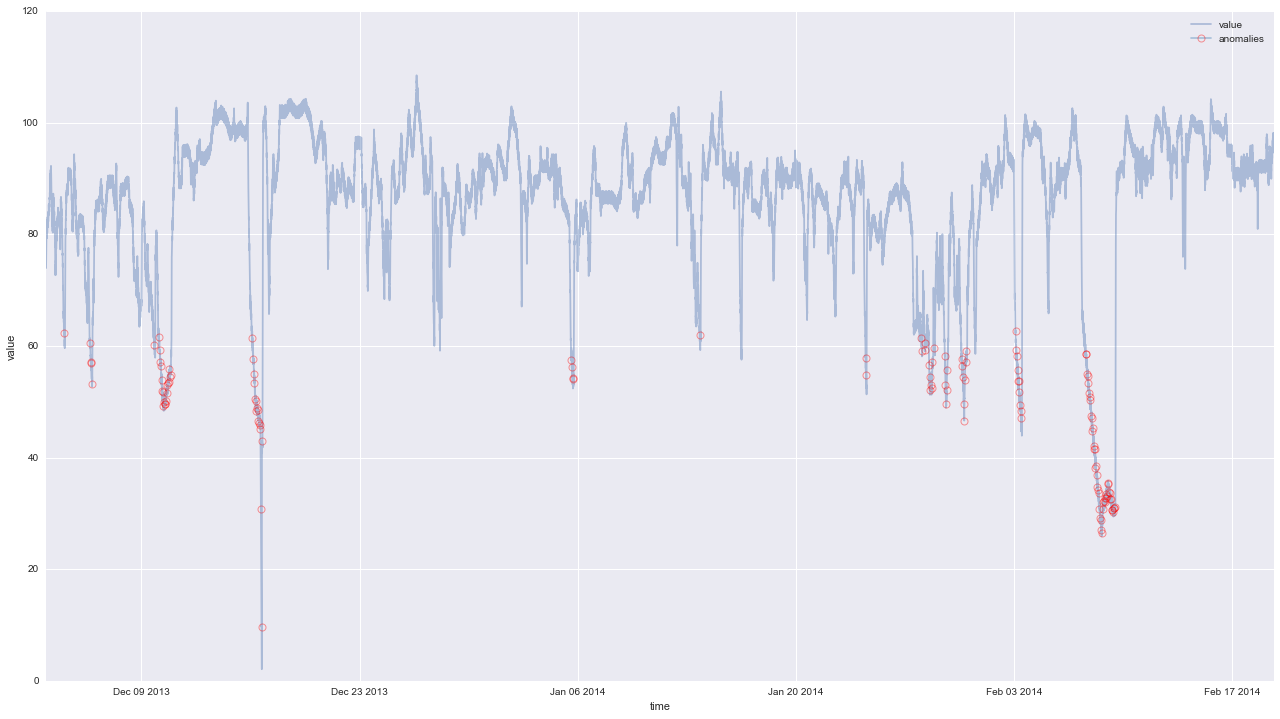

In [8]:
# plot_ts(timeS_DF, 'value', './figures/orig_%s.png' % n_file ) # original data
plot_ts_anoms(merged_DF,'./void') # anoms marked